<a href="https://colab.research.google.com/github/swati23/6-models-LDA-LR-KNN-CART-NB-SVM-and-accuracy-estimations-for-each-on-same-data-iris/blob/master/Breast_cancer_predicton_using_Supervised_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
 %matplotlib inline

In [21]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [22]:
cancer = pd.read_csv('data.csv')
print(cancer.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [0]:
cancer.drop('Unnamed: 32', axis=1, inplace=True)

In [24]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
print("dimension of cancer data: {}".format(cancer.shape))

dimension of cancer data: (569, 32)


In [26]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
x=cancer.iloc[:, :-1].values
x

array([[842302, 'M', 17.99, ..., 0.7119, 0.2654, 0.4601],
       [842517, 'M', 20.57, ..., 0.2416, 0.18600000000000003, 0.275],
       [84300903, 'M', 19.69, ..., 0.4504, 0.243, 0.3613],
       ...,
       [926954, 'M', 16.6, ..., 0.3403, 0.1418, 0.2218],
       [927241, 'M', 20.6, ..., 0.9387, 0.265, 0.4087],
       [92751, 'B', 7.76, ..., 0.0, 0.0, 0.2871]], dtype=object)

In [28]:
print(cancer.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


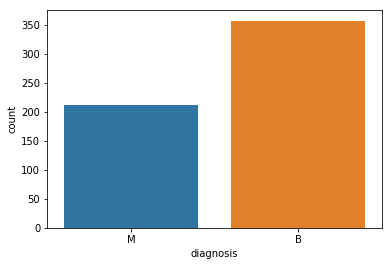

In [29]:
import seaborn as sns

sns.countplot(cancer['diagnosis'],label="Count")

In [30]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

We are not using Id column (no need in training)

Check the datatype of each column:

In [31]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

A column, diagnosis, is categorical and has two classes, 'B' (Benign) and 'M' (Malignant). All other
variables are numerical, so we can skip data type conversion.So diagnosis is our response variable Let's now take a closer look at our response variable, since it is the main focus of our analysis. Firsltly We will check the distribution of its classes.

In [32]:
benign, malignant = cancer['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(cancer) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(cancer) * 100, 2), '%')

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


# Multimodal Data Visualizations

*   Scatter plots
*   Correlation matrix

# **Correlation Matrix**
As said earlier, let's take a look at the correlations between our variables. This time however, we will create a correlation matrix with all variables (i.e., the "mean" columns, the "standard errors" columns, as well as the "worst" columns).



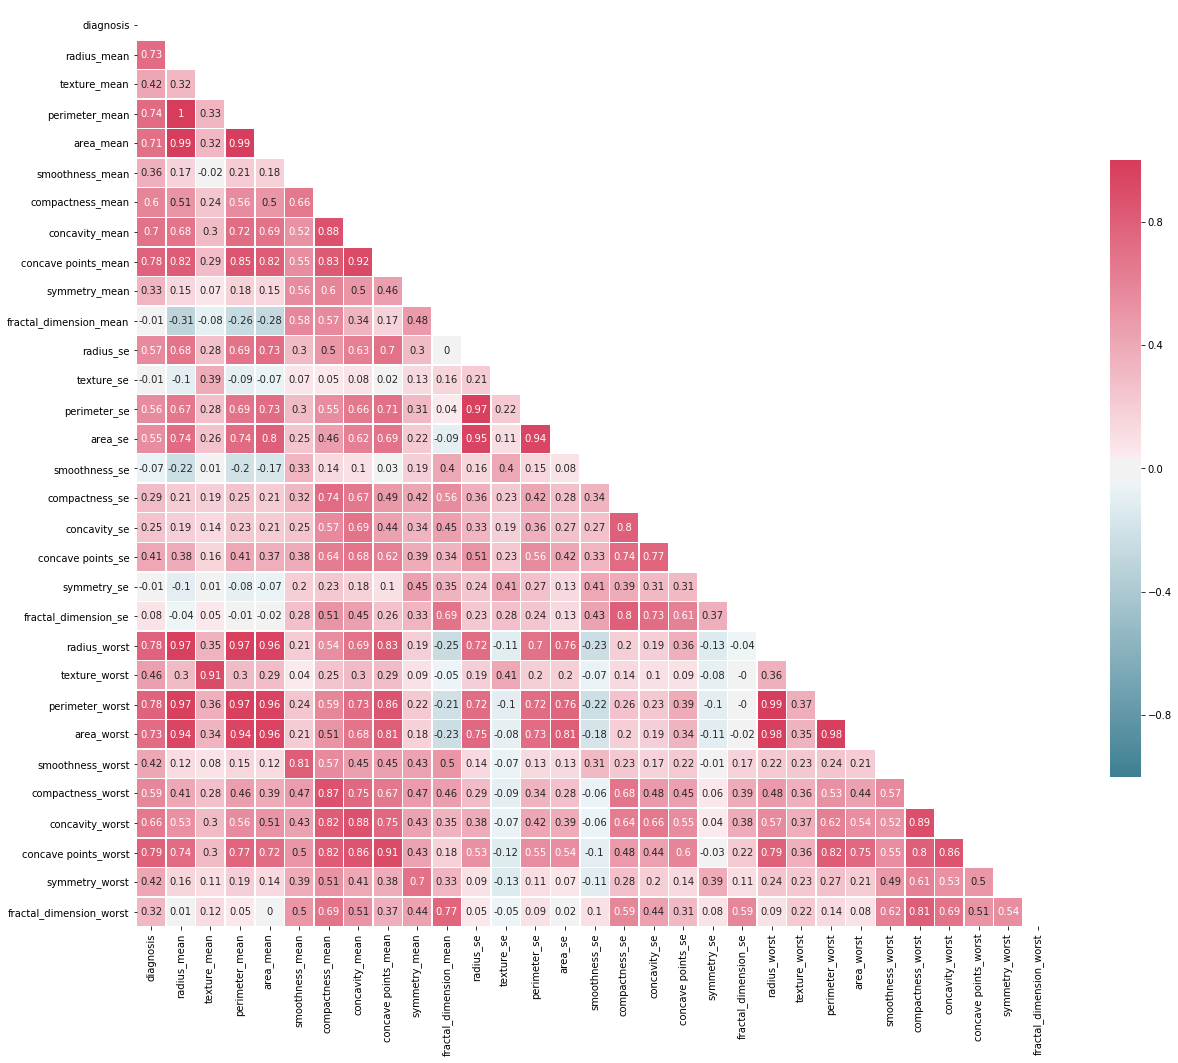

In [0]:

# Generate and visualize the correlation matrix
corr = cancer.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(18, 18))

# Define custom colormap
cmap = sns.diverging_palette(220, 5, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()


# **Feature Selection**:



** **%Pre-Processing the data%**

Data preprocessing is a important step for any data analysis problem. To prepare data for machine learning algorithms that we want to use.This involves a number of activities such as:

Assigning numerical values to categorical data;

*   Handling missing values
*   Normalizing the features (so that features on small scales do not dominate when fitting a model   
     to the data).

 I will use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction.

&&
Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model.

>**Label encoding**
Here, I assign the 30 features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers Indented block




In [0]:
#Assign predictors to a variable of ndarray (matrix) type
array = cancer.values
X = array[:,1:31]
y = array[:,0]

In [0]:

#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Call the transform method of LabelEncorder on two dummy variables
#le.transform (['M', 'B'])

Already done -After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively, illustrated by calling the transform method of LabelEncorder on two dummy variables.**

**Evaluating Model Accuracy:** Split data into training and test sets
The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will

Split the available data into a training set and a testing set. (75% training, 25% test)
Train the algorithm on the first part,
make predictions on the second part and
evaluate the predictions against the expected results.
The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.

In [0]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

# **Feature Standardization**
Standardization is a useful technique to transform attributes with a Gaussian distribution and differin
g means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

Most machine learning and optimization algorithms behave much better if features are on the same scale.

Here, I use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one

Feature decomposition using Principal Component Analysis( PCA)

Use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible when working with only 2 dimensions. I will use PCA

In [0]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(x)

In [0]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)



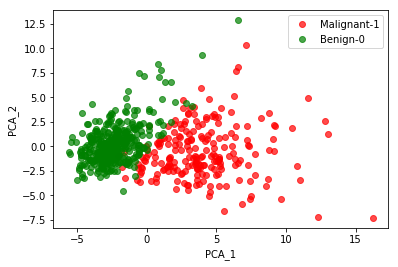

In [0]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][cancer.diagnosis == 1],PCA_df['PCA_2'][cancer.diagnosis == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][cancer.diagnosis == 0],PCA_df['PCA_2'][cancer.diagnosis == 0],'o', alpha = 0.7, color = 'g')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant-1','Benign-0'])
plt.show()

In order to decide how many principal components (PCA) should be retained, it is common to summarise the results of a principal components analysis by making a scree plot. 

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


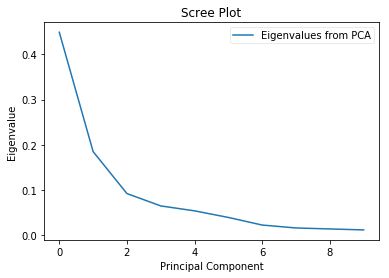

In [0]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_


plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.


# ** Supervised Learning Algorithms:**
1. Logistic Regression
2. NaiveBayes
3.KNearest Neighbour
4.Random Forest
5. Decision Tree
6.Support Vector Machine
7. Gradient Boosting
8.Neural Network

# **1. Logistic Regression**

One of the most common linear classification algorithms is logistic regression. Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm.

Split the dataset into train and test dataset

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:, cancer.columns != 'diagnosis'], cancer['diagnosis'], stratify=cancer['diagnosis'], random_state=66)

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.930
Test set score: 0.902


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The default value of C=1 provides quite good performance, with 96% accuracy on training and 0.94 accuracy on test set. Let’s try to increase C to fit a more flexible model to see whether we can improve the performance.

In [38]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))


Training set score: 0.925
Test set score: 0.895


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Using C=100 results in higher accuracy on both training set and test set, confirming that less regularization and a more complex model should perform better.

In [39]:
logreg100 = LogisticRegression(C=150).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))


Training set score: 0.927
Test set score: 0.895


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:

logreg100 = LogisticRegression(C=0.001).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))



  

Training set score: 0.927
Test set score: 0.902


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Using C=0.01 results in lower accuracy on the training set and much lower accuracy on the test set, indicates our model doesn’t generalize well from our training data to unseen data. With C=0.001, overfitting occurs.

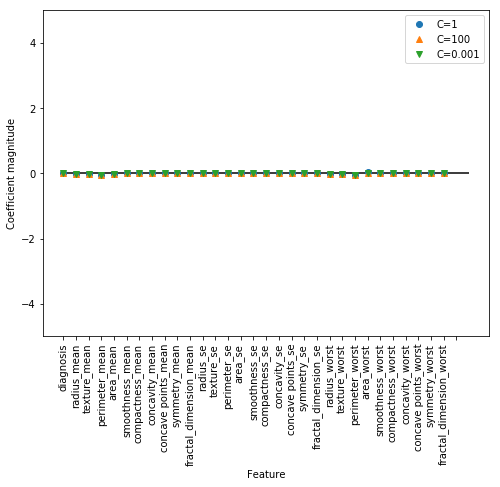

In [41]:
cancer_features = [x for i,x in enumerate(cancer.columns) if i!=0]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg100.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.shape[1]), cancer_features, rotation=90)
plt.hlines(0, 0, cancer.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')


# **2. NaiveBayes Classifier**

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train.values.ravel())

print("Accuracy of GNB classifier on training set: {:.2f}".format(gnb.score(X_train, y_train)))
print("Accuracy of GNB classifier on test set: {:.2f}".format(gnb.score(X_test, y_test)))

 

Accuracy of GNB classifier on training set: 0.63
Accuracy of GNB classifier on test set: 0.62


# **3. KNearest Neighbour**

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.
In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. 
An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 

If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

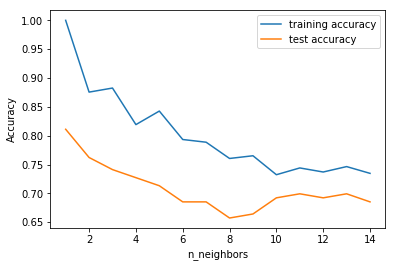

In [43]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

This plot is showing the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering a single nearest neighbor, the prediction on the training set is perfect. 
But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex.

The best performance is somewhere around three neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is more than 90% accuracy, which might still be pretty good.

The above plot suggests that we should shoose n_neighbors=3. Here we are:


In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.74


# **4. Random Forest**
Random Forest is the go to machine learning algorithm that works through bagging approach to create a bunch of decision trees with a random subset of the data.

It is considered to be one of the most effective algorithm to solve almost any prediction task. It can be used both for classification and the regression kind of problems.

It is a combination of tree predictors where each tree depends on the values of a random vector sampled independently with the same distribution for all trees in the forest.



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.944


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The random forest gives us an accuracy of 95.1%, better than a single decision tree, without tuning any parameters.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


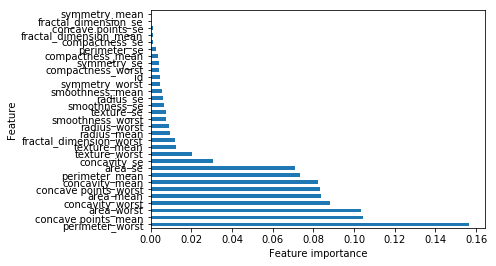

In [79]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(32)
   .plot(kind='barh')) 

The random forest also gives a lot of importance to the “perimeter worst” feature, but it also chooses “perimeter worst” to be the most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.


# **5. Decision Tree**
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

Decision tree is one of the predictive modelling approaches used in statistics, data mining and machine learning.

In [60]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


In [66]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.937


# How to use Features in Decision Tree :

Feature importance in trees

Feature importance rates how important each feature is for the decision a tree makes. 
It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [67]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.01696019 0.         0.         0.         0.02285783 0.
 0.0084801  0.         0.01572222 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0084801  0.         0.         0.05099836 0.7643834
 0.0057787  0.         0.01007777 0.         0.09626133 0.
 0.        ]


Visualization of Feature Importance:

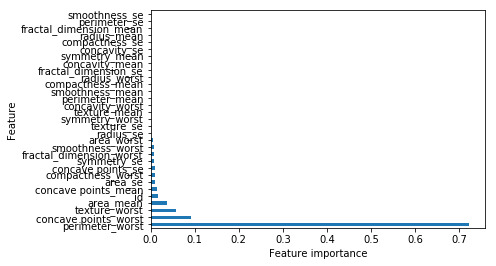

In [78]:
import matplotlib.pyplot as plt
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

(pd.Series(model.feature_importances_, index=X_train.columns)
 
   .nlargest(32)
   .plot(kind='barh')) 

Feature perimeter_worst is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.

# **6. Support Vector Machine**
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems.

In [80]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The model overfits quite substantially, with a perfect score on the training set and only 63% accuracy on the test set.

SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale:

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.944


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [83]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Here, increasing C allows us to improve the model significantly, resulting in 96.5% test set accuracy.

# **7. Gradient Boosting**

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [85]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.944


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, none of these methods increased the generalization performance of the test set.

Still, we can visualize the feature importances to get more insight into our model even though we are not really happy with the model.

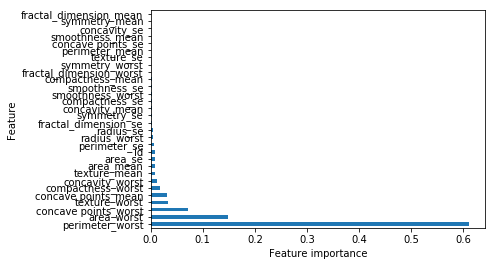

In [87]:
import matplotlib.pyplot as plt
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

(pd.Series(model.feature_importances_, index=X_train.columns).nlargest(30).plot(kind='barh')) 

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, though the gradient boosting completely ignored some of the features.

## 8.Neural Network 
The learning algorithm of a neural network can either be supervised or unsupervised.

A neural net is said to learn supervised, if the desired output is already known.

In [89]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.70
Accuracy on test set: 0.68


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


This is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

In [90]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The results are much better after scaling, and already quite competitive.

In [96]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.762


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


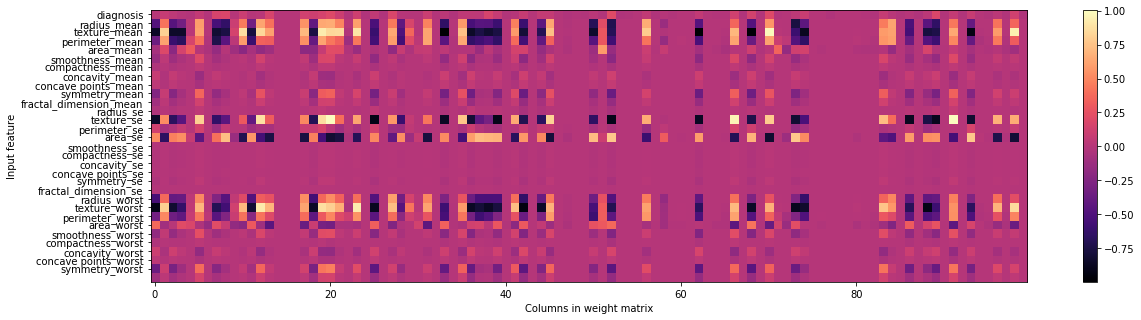

In [98]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='magma')
plt.yticks(range(30), cancer_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

The above plot is showing  the weights that were learned connecting the input to the first hidden layer. 
The rows in this plot correspond to the 30 input features, while the columns correspond to the 100 hidden units. 
Light colors represent large positive values, while dark colors represent negative values.

One possible inference we can make is that features that have very small weights for all of the hidden units are “less important” to the model.
We can see that “mean smoothness” and “mean compactness,” in addition to the features found between “smoothness error” and “fractal dimension error,” have relatively low weights compared to other features. 
This could mean that these are less important features or possibly that we didn’t represent them in a way that the neural network could use.